<h1 align="center"><strong>Texturas de Haralick</strong></h1>

Es una técnica que mide la textura de una imagen como la combinación de pixeles dentro de una imagen.La textura en las imágenes son patrones repetitivos.

In [2]:
import numpy as np
import pandas as pd 
import cv2 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
from skimage.feature import greycomatrix, greycoprops
from IPython.display import Image
from IPython.core.display import HTML

# Matriz de co-ocurrencia de niveles de gris(GLCM)

Las características de GLCM representan la relación espacial entre píxeles adyacentes de una imagen. Estas características tienen cambio rápido de valores en el caso de imágenes basadas en texturas finas y un cambio lento en los valores en imágenes basadas en texturas gruesas.

$$C_{\Delta x, \Delta y}(i,j) = \sum_{x=0}^{n-1} \sum_{y=0}^{m-1} 
\begin{cases} 1, & \text{if }I(x, y)=i\text{ and }I(x+\Delta x, y+\Delta y)=j \\ 
0, & \text{otherwise}\end{cases}$$

If $C_{5,10}(200,20) = N$, significa que, en la imagen, hay 𝑁 apariciones de un píxel con un valor de 200 y un píxel con un valor de 20 de manera que su posición es $(x,y)$ and $(x+5,y+10)$.

Las matrices de co-ocurrencia miden la estadistica de que ocurran dos pixeles de manera simultánea.

In [4]:
# Imagen de entrada
I = np.zeros((4,4),dtype = 'uint8') 
I[0,0],I[0,1],I[0,2],I[0,3] = 1,0,1,2
I[1,0],I[1,1],I[1,2],I[1,3] = 1,1,0,0
I[2,0],I[2,1],I[2,2],I[2,3] = 0,2,1,0
I[3,0],I[3,1],I[3,2],I[3,3] = 0,2,0,2
print(I)

[[1 0 1 2]
 [1 1 0 0]
 [0 2 1 0]
 [0 2 0 2]]


La matriz de co-ocurrencia P10 indica un vector 'v' en la dirección -1*i + 0*j (baja un pixel y no se mueve ni a la izquierda ni a la derecha). Esto indica que se debe analizar dos pixeles uno el pixel de referencia y el otro que esta en la posicion del vector v.

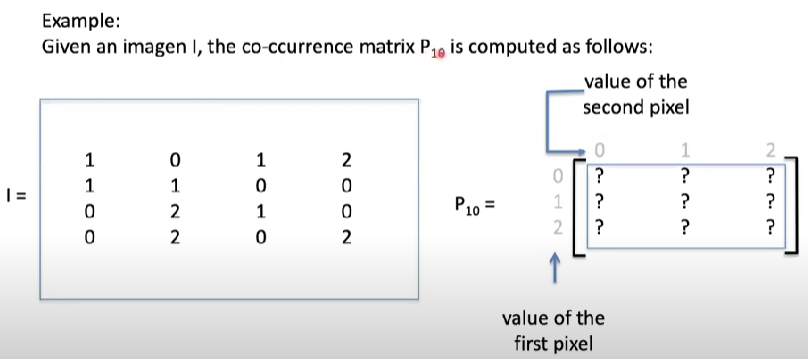

In [7]:
Image(filename = r"C:\Users\titos\Github\Procesamiento Imagenes\Cap09_Extracción de características\9.3.Caracteristicas de intensidad\Analisis de texturas-Haralick\imagenes\example01.PNG", 
      width=1000, 
      height=1000)

**¿Qué pasa si tenemos valores altos en la diagonal principal?**

Si en la dirección del vector el pixel de referencia y el pixel vecino son iguales, quiere decir que se van a tener tonos de grises iguales al rededor de los pixeles de referencia.

**¿Qué pasa si tenemos valores bajos en la diagonal principal?**

En la dirección seleccionada que indica el vector no hay cambios significativos.

In [5]:
# Calculando la matriz de co-ocurrencia P10 de la imagen de 4 x 4
uniques = np.unique(I,return_counts=True)[0]
num_uniques = len(uniques)
print(num_uniques)

3


In [6]:
def log_nz(M):
    M2 = M.copy()
    M2[M==0] = 0.5
    return np.log(M2)

In [7]:
P10 = np.zeros((num_uniques,num_uniques),dtype = 'float32') 
dx = 0
dy = 1
for y in range(I.shape[0]-dy):
    for x in range(I.shape[1]-dx):
        i = int(I[y,x])
        j = int(I[y+dy, x+dx])
        P10[i,j] += 1

#plt.figure()
#plt.imshow(P10, plt.cm.jet)
#plt.show()

print("Matriz de co-cocurrencia: \n", P10)

Matriz de co-cocurrencia: 
 [[2. 2. 1.]
 [3. 1. 1.]
 [1. 0. 1.]]


## ¿Qué es lo que se hace con Haralick?

1. Se define un numero "d" en pixeles (lo cual define la distancia del primer pixel con el segundo pixel), si los cambios ocurren lentamente el "d" debe hacerse grande, si ocurre en vecindades pequeñas el d debe ser pequeño.


2. Definimos las matrices de co-ocurrencia: P0d, Pdd, Pd0, P-dd. Entonces calculo 4 matrices de co-ocurrencia, de las cuales le saco a cada una 14 características estadísiticas; entonces a cada caracterítica le saco el promedio y el rango(max-min). 


3. Al final obtengo un vector de 28 características como salida de aplicar Haralick a la imagen original.

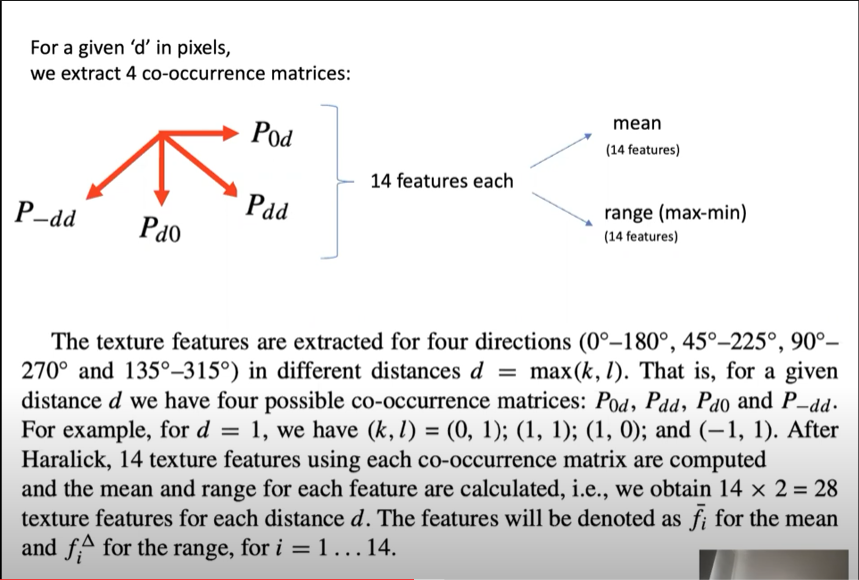

In [3]:
Image(filename = r"C:\Users\titos\Github\Procesamiento Imagenes\Cap09_Extracción de características\9.3.Caracteristicas de intensidad\Analisis de texturas-Haralick\imagenes\example02.PNG", 
      width=1000, 
      height=1000)

# Ejemplos

## Ejemplo 1

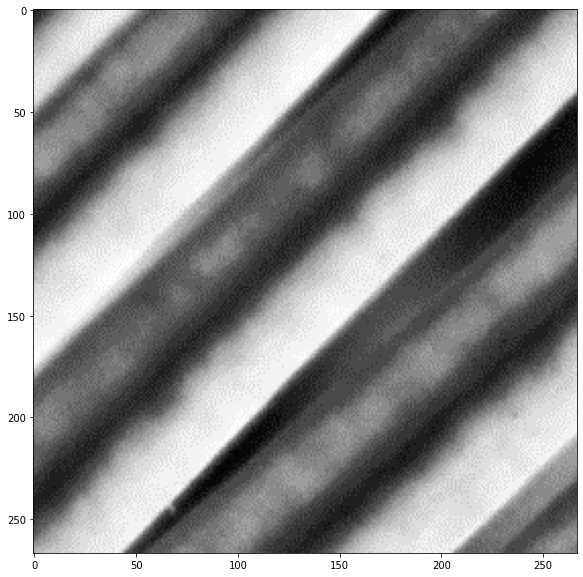

(267, 267)


In [8]:
# Ejemplo 1
H = cv2.imread("Data/Haralick.jpg", -1)
H = cv2.cvtColor(H,cv2.COLOR_BGR2GRAY)
plt.figure(1,figsize = (10,10))
plt.imshow(H,cmap='gray')
plt.show()
print(H.shape)

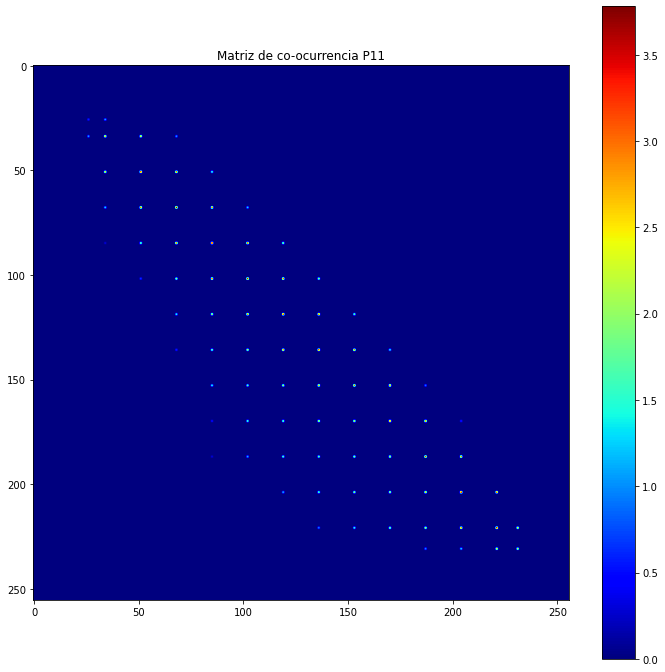

In [9]:
P11 = np.zeros((256,256),dtype = 'float32') 
dx = 1 
dy = 1
for y in range(H.shape[0] - dy):
    for x in range(H.shape[1] - dx):
        i = int(H[y,x])
        j = int(H[y+dy, x+dx])
        P11[i,j] += 1

plt.figure(1,figsize=(12,12))
plt.title("Matriz de co-ocurrencia P{}{}".format(dy,dx))
plt.imshow(np.log10(P11 + 1), plt.cm.jet)
plt.colorbar()
plt.show()

Como se ve en la diagonal principal de la matriz de co-ocurrencia,se tienen muchos tonos de gris que en esa dirección nos esta dando el mismo valor.

## Ejemplo 2

<class 'numpy.ndarray'>
(220, 260)


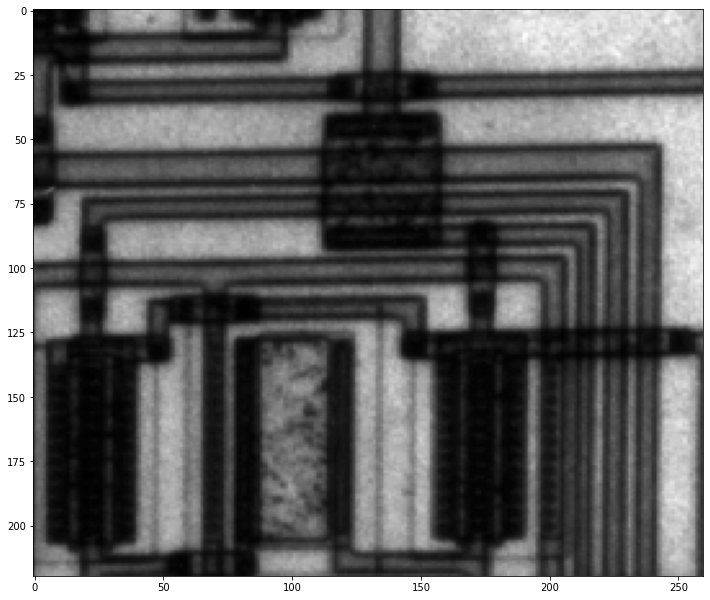

In [10]:
# Ejemplo 2
circuito = cv2.imread("./Data/circuito.png",-1)
circuito = circuito[80:300,90:350]
print(type(circuito))
circuito = cv2.cvtColor(circuito,cv2.COLOR_BGR2GRAY)
plt.figure(1,figsize=(12,12))
plt.imshow(circuito,cmap='gray')
print(circuito.shape)

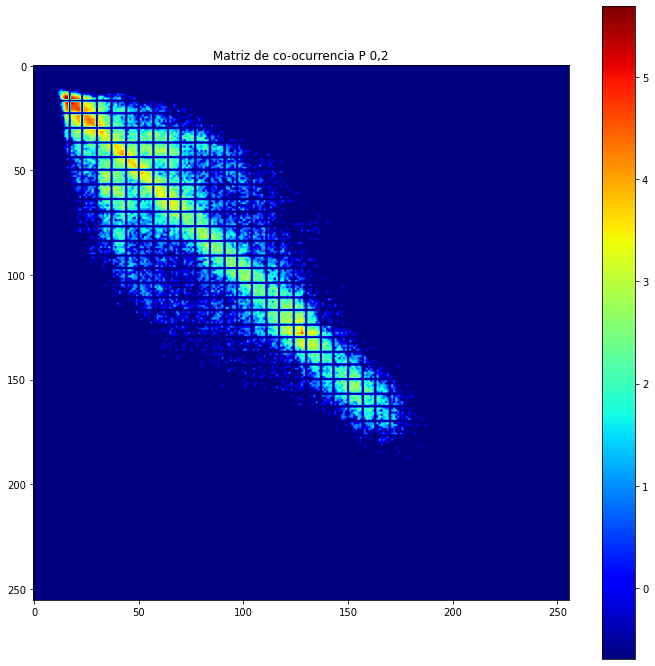

In [11]:
P11 = np.zeros((256,256),dtype = 'float32') 
dx = 0 
dy = 2  
for y in range(circuito.shape[0] - dy):
    for x in range(circuito.shape[1] - dx):
        i = int(circuito[y,x])
        j = int(circuito[y+dy, x+dx])
        P11[i,j] += 1

plt.figure(1,figsize=(12,12))
plt.title("Matriz de co-ocurrencia P {},{}".format(dx,dy))
plt.imshow(log_nz(P11), plt.cm.jet)
plt.colorbar()
plt.show()

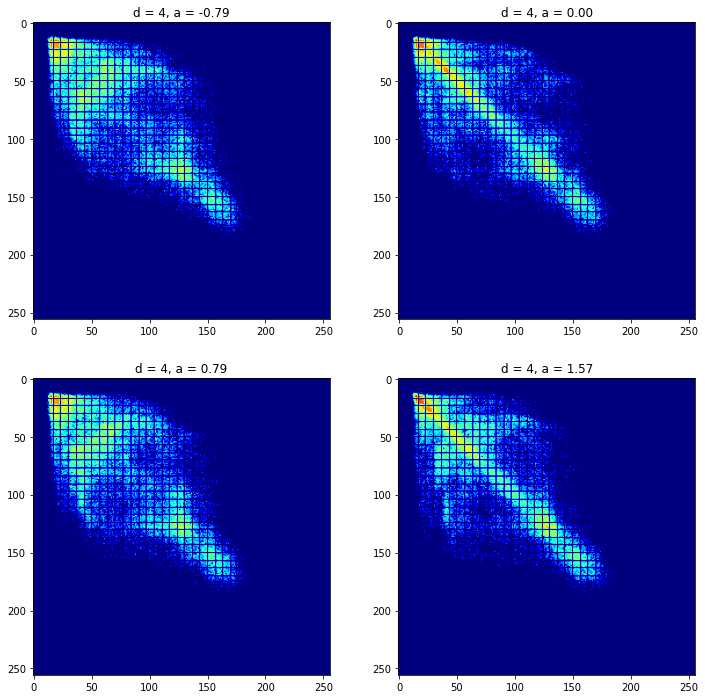

In [17]:
# Ejemplo 3 
distances = [4] # Distances in pixels that we want to check
angles = [-np.pi/4,0, np.pi/4,np.pi/2] # Angles in radians that we want to check

co_matrices = log_nz(greycomatrix(circuito, distances, angles).astype('float'))

plt.figure(figsize=(12,12))
i = 1
for idd,d in enumerate(distances):
    for ida,a in enumerate(angles):
        C = co_matrices[:,:,idd,ida]
        plt.subplot(2,2,i)
        plt.imshow(C, vmin=co_matrices.min(), vmax=co_matrices.max(), cmap=plt.cm.jet) # Give the same scale to all images!
        plt.title('d = %d, a = %.2f'%(d,a))
        i += 1
plt.show()

In [30]:
# Ejemplo 4
print("Imgen inicial: \n",I)
dst = [1] 
ang = [np.pi/2] # (np.pi/2 --> (dx =0 y dy = dst))
co_matrices = greycomatrix(I, dst, ang).astype('float')
print("Matriz GLCM: \n", co_matrices[:,:,0,0])

## Indicadores 
dissimilarity = greycoprops(co_matrices, 'dissimilarity')[0][0]
correlation = greycoprops(co_matrices, 'correlation')[0][0]
print("Disimilaridad: ",dissimilarity)
print("Correlacion:", correlation)

Imgen inicial: 
 [[1 0 1 2]
 [1 1 0 0]
 [0 2 1 0]
 [0 2 0 2]]
Matriz GLCM: 
 [[2. 2. 1. ... 0. 0. 0.]
 [3. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Disimilaridad:  0.8333333333333333
Correlacion: 0.03481553119113951


## Ejemplo 3

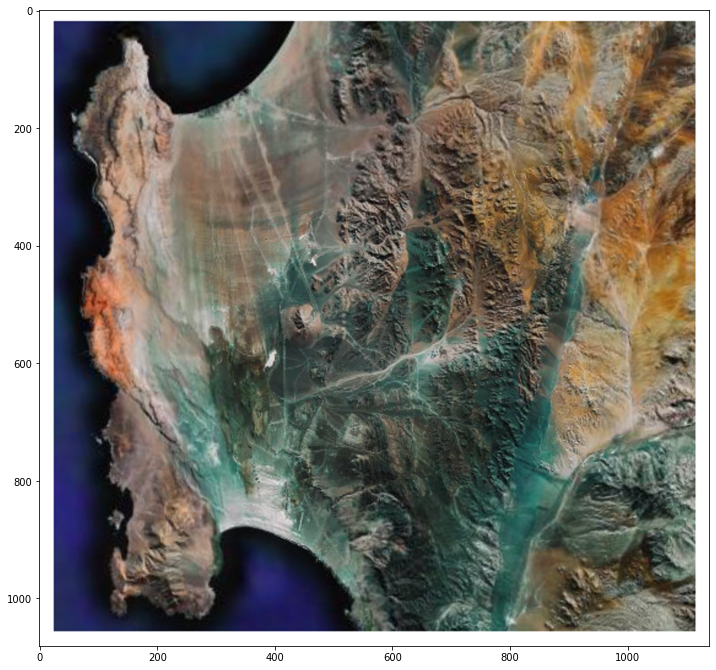

In [31]:
# Ejemplo 2
satelital = cv2.imread(r"./imagenes/satelital.png",-1)
#circuito = circuito[80:300,90:350]
# print(type(circuito))
satelital = cv2.cvtColor(satelital,cv2.COLOR_BGR2RGB)
plt.figure(1,figsize=(12,12))
plt.imshow(satelital,cmap='gray')

(1081, 1139)


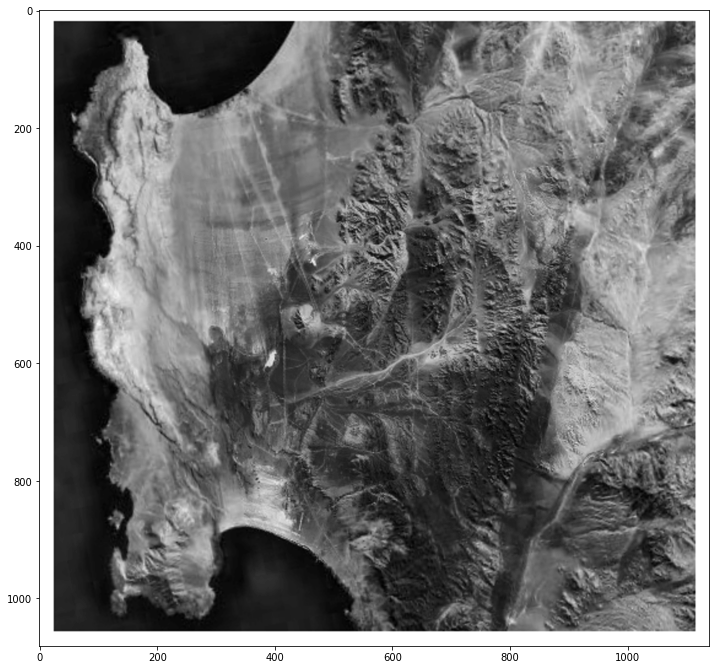

In [33]:
# Tomando solo el canal Red , tenemos lo siguiente:
satelital_banda_R = satelital[:,:,0]
plt.figure(1,figsize=(12,12))
plt.imshow(satelital_banda_R,cmap='gray')
print(satelital_banda_R.shape)

In [28]:
os.getcwd()

'C:\\Users\\titos\\Github\\Procesamiento Imagenes\\Cap09_Extracción de características\\9.3.Caracteristicas de intensidad\\Analisis de texturas-Haralick'